# Include
* ### Data preprocessing
* ### KNN
* ### Naive Bayas
* ### Logistic Regression
* ### SVM
* ### Neural Network

# Importing Libraries

In [2]:
%%capture
!pip install imblearn

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline

plt.style.use('Solarize_Light2')

### https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

# Load Dataset

In [4]:
import gdown

# Replace with your Google Drive shareable link
url = 'https://drive.google.com/file/d/1BrnyTJLxo0AgDD9A542ojbwWZfi5b3Wl/view?usp=sharing'

# Convert to the direct download link
file_id = url.split('/d/')[1].split('/')[0]
direct_url = f'https://drive.google.com/uc?id={file_id}'

# Download
gdown.download(direct_url, 'magic04.data', quiet=False)
!ls

Downloading...
From: https://drive.google.com/uc?id=1BrnyTJLxo0AgDD9A542ojbwWZfi5b3Wl
To: /content/magic04.data
100%|██████████| 1.48M/1.48M [00:00<00:00, 88.1MB/s]

drive  magic04.data  sample_data


In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "label"]
df = pd.read_csv("./magic04.data", names=cols) # csv => comma separated values
df.head(2)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [6]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [7]:
df["label"].unique()

array(['g', 'h'], dtype=object)

# Convert Labels to Numbers

In [8]:
df["label"] = (df["label"] == "g").astype(int) # 0 == g & 1 == h
df.head(2)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1


# Visualization

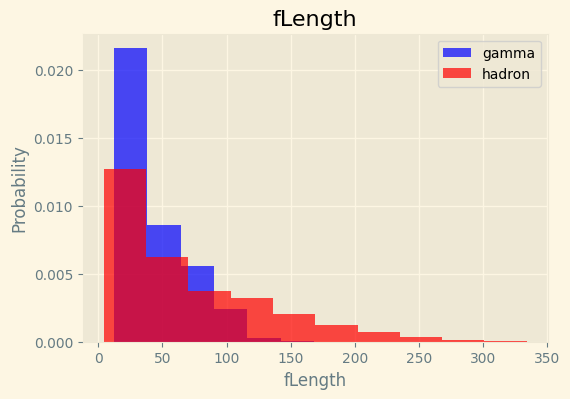

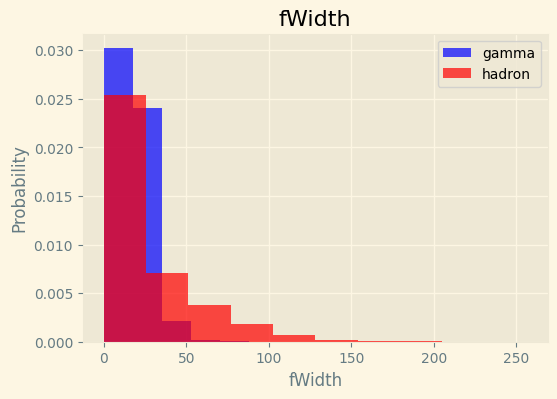

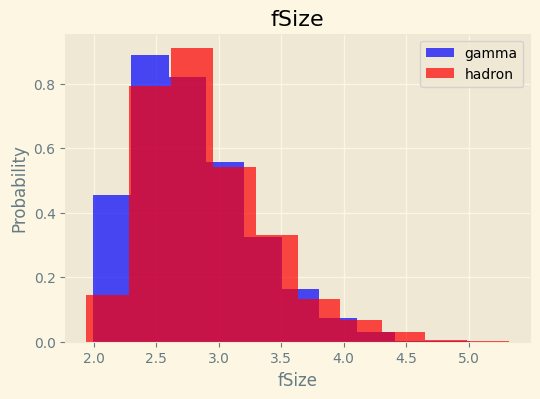

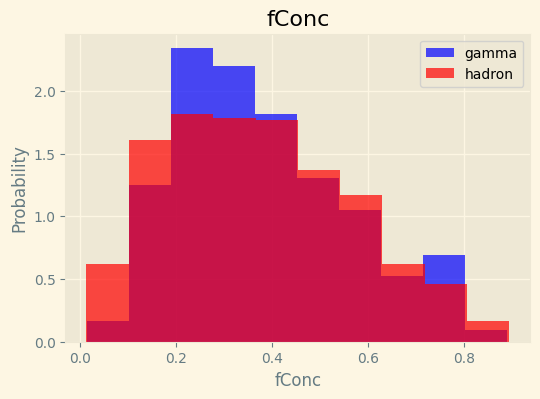

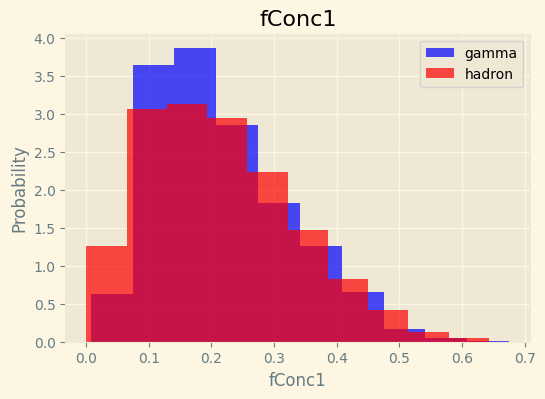

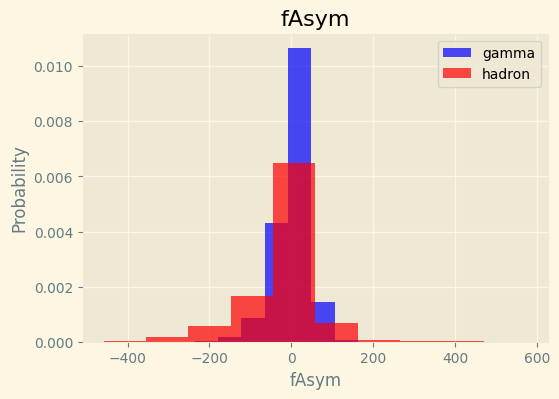

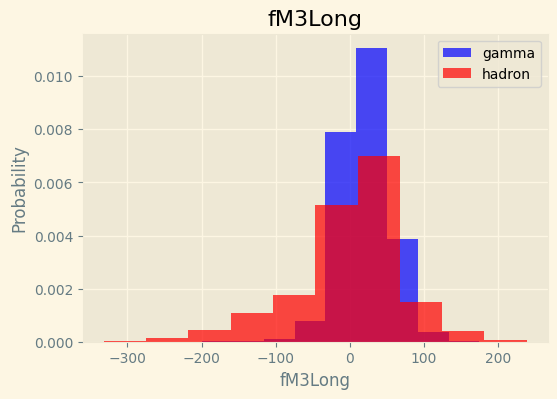

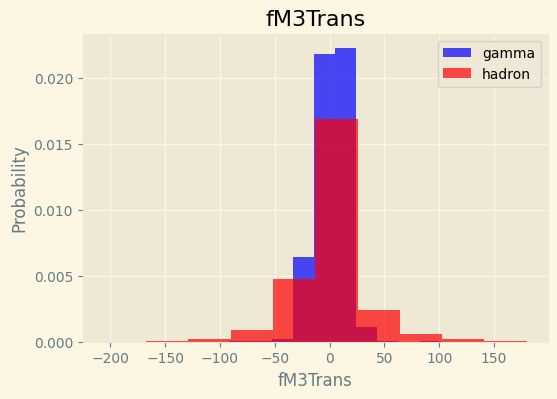

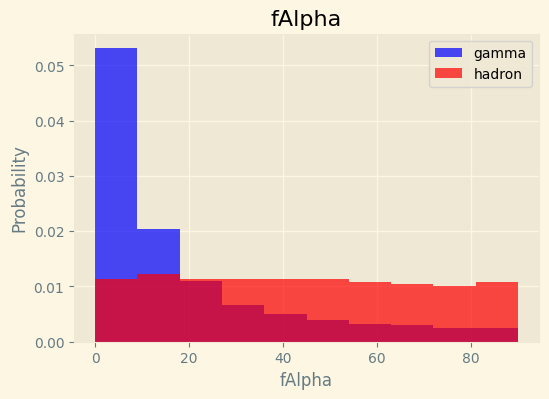

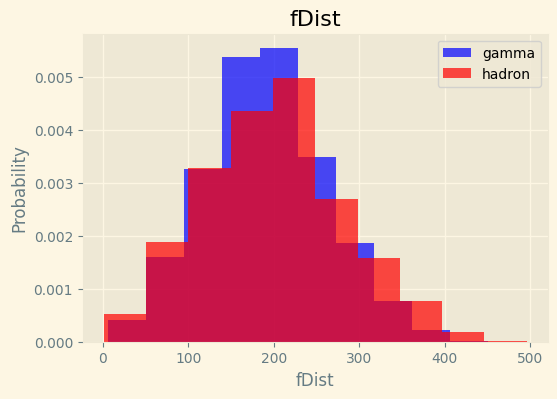

In [9]:
# sns.scatterplot(x="fLength", y="fWidth", data=norm_df, hue="label", palette="tab10", s=25)

for label in cols[:-1]:
  plt.figure(figsize=(6, 4))
  plt.hist(x=df[df["label"]==1][label], color="blue", label="gamma", density=True, alpha=0.7)
  plt.hist(x=df[df["label"]==0][label], color="red", label="hadron", density=True, alpha=0.7)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train and Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["label"], axis=1), df["label"], test_size=0.33, random_state=42)

# MinMaxScaler vs StandardScaler

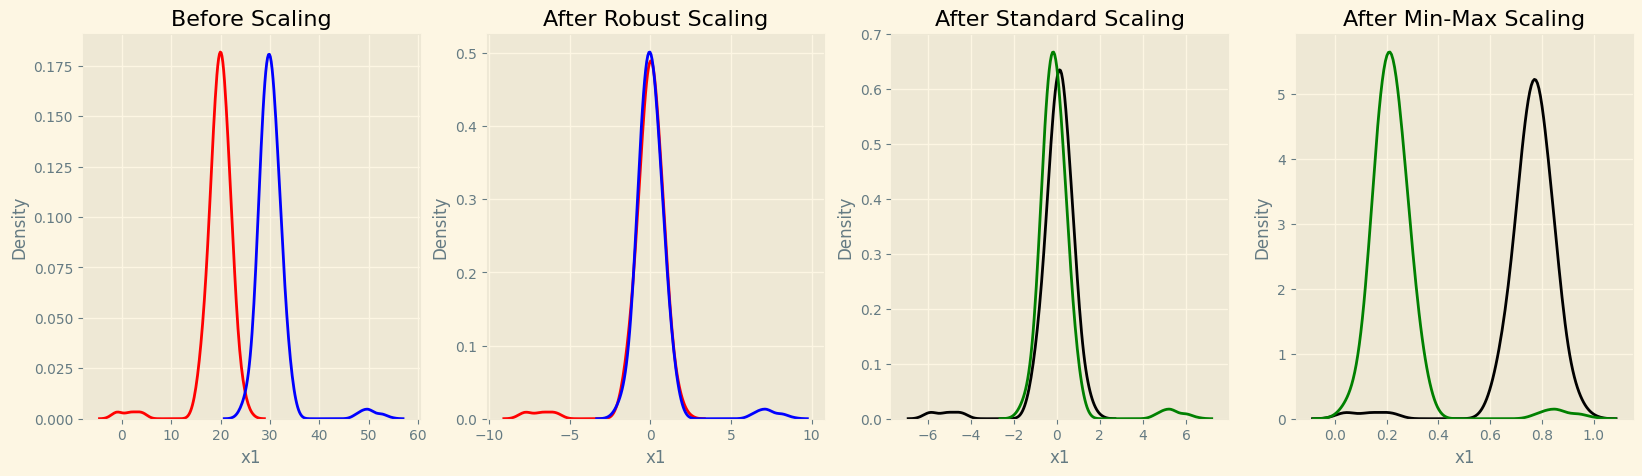

In [11]:
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal


scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])


scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])


scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

# Normalization or Standardization
The recommended approach is to normalize the data after splitting base on train

In [12]:
def normalization(data, model):
  norm_data= pd.DataFrame(data=model.transform(data), columns=data.columns)

  return norm_data

In [13]:
scalar_model = preprocessing.StandardScaler().fit(X_train)

# Apply the fitted scaler to both sets
X_train = normalization(X_train, scalar_model)
X_test = normalization(X_test, scalar_model)

# Loss Function
**Loss**: The different between real labels and predicted labels

In [14]:
def cal_loss(y_true, y_pred):
  return log_loss(y_true=y_true, y_pred=y_pred)

# Increasing gamma to match hadron (Over Sampling)
As you can see gamma's are half of hadron, This may lead us to a bad model

In [15]:
# print(len(X_train[y_train == 1])) # gamma
# print(len(X_train[y_train == 0])) # hadron

print(sum(y_train == 1)) # gamma
print(sum(y_train == 0)) # hadron

8261
4482


In [16]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

print(sum(y_train == 1)) # gamma
print(sum(y_train == 0)) # hadron

8261
8261


# KNN Classification

* **Accuracy** is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

    If you have imbalanced classes, accuracy is less useful since it gives equal weight to the model’s ability to predict all categories.


* **precision** In other words, precision answers the question: how often the positive predictions are correct?

    It works well for problems with imbalanced classes since it shows the model correctness in identifying the target class.

    precision gamma = True gammas / True gammas + False gammas

    False gammas = The samples that are Hadron but labeled as gammma



* **Recall** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances. The latter includes true positives (successfully identified cases) and false negative results (missed cases).

Loss k 1: 6.701122113286556
Loss k 3: 6.6207316166404455
Loss k 5: 6.551825476658065
Loss k 7: 6.339364878379057
Loss k 9: 6.247490025069215
Loss k 11: 6.167099528423104
Loss k 13: 6.075224675113263
Loss k 15: 6.035029426790207
Loss k 17: 6.046513783453938
Loss k 19: 6.000576356799016


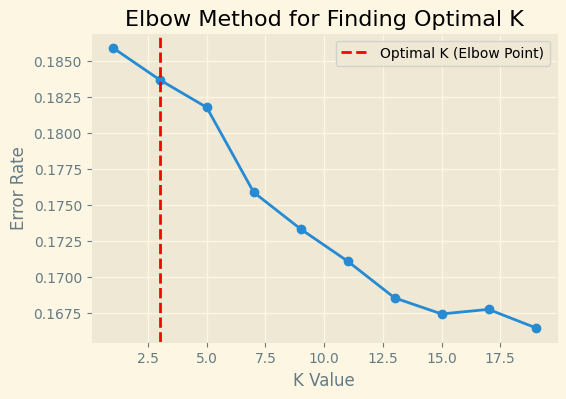

In [17]:
k_values = range(1, 20, 2)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)
    loss = cal_loss(y_test, y_pred)
    print(f"Loss k {k}: {loss}")

plt.figure(figsize=(6, 4))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn_model.predict(X_test)
y_true = y_test

# accuracy = len(list(filter(lambda x: x[0] == x[1], zip(y_true, y_pred)))) / len(y_true)
# print(f"accuracy: {accuracy:.2%}")

report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

loss = cal_loss(y_true, y_pred)
print(f"Loss: {loss}")

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2206
           1       0.86      0.86      0.86      4071

    accuracy                           0.82      6277
   macro avg       0.80      0.80      0.80      6277
weighted avg       0.82      0.82      0.82      6277

Loss: 6.6207316166404455


# Naive Bayas
P(A|B) = P(B|A) * P(A) / P(B)

P(A|x,y,z) = P(x,y,z|A) * P(A) / P(x,y,z)

P(x,y,z|A) = P(x|A).P(y|A).P(z|A) / P(x,y,z)

We can remove P(x,y,z) for compcomparison

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = nb_model.predict(X_test)
y_true = y_test

report = classification_report(y_true, y_pred)
print(report)

"""
Base on report:
  The accuracy is 72%, meaning the model correctly predicted 72% of all samples.

  For class 0: 68% of the samples predicted as 0 were actually 0.
  For class 1: 73% of the samples predicted as 1 were actually 1.

  The model has low recall (0.40) for class 0, meaning it's missing many actual class 0 instances.
  false negatives for class 0 are high (i.e., many 0s are wrongly predicted as 1).
"""

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      2206
           1       0.73      0.90      0.81      4071

    accuracy                           0.72      6277
   macro avg       0.71      0.65      0.66      6277
weighted avg       0.72      0.72      0.70      6277



"\nBase on report:\n  The accuracy is 72%, meaning the model correctly predicted 72% of all samples.\n\n  For class 0: 68% of the samples predicted as 0 were actually 0.\n  For class 1: 73% of the samples predicted as 1 were actually 1.\n\n  The model has low recall (0.40) for class 0, meaning it's missing many actual class 0 instances.\n  false negatives for class 0 are high (i.e., many 0s are wrongly predicted as 1).\n"

# Logistic Regression
logistic regression supports both binary and multiclass classification problems

## Binary Classification
Uses the sigmoid function


## Multiclass Classification

* One-vs-Rest (OvR) (default in scikit-learn)

      Trains one binary classifier per class.

* Multinomial Logistic Regression (a.k.a. Softmax Regression)

      Uses the softmax function to predict the probability distribution across all classes.

      Requires solver='lbfgs' or similar in scikit-learn.

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = log_model.predict(X_test)
y_true = y_test

report = classification_report(y_true, y_pred)
print(report)

"""
Base on report:
  The accuracy is 79%, meaning the model correctly predicted 78% of all samples.

  For class 0: 69% of the samples predicted as 0 were actually 0.
  For class 1: 84% of the samples predicted as 1 were actually 1.

  The model has lower recall (0.71) for class 0, meaning it's missing more actual class 0 instances than 1.
  false negatives (0s are wrongly predicted as 1).
"""

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2206
           1       0.84      0.82      0.83      4071

    accuracy                           0.78      6277
   macro avg       0.76      0.77      0.77      6277
weighted avg       0.79      0.78      0.79      6277



"\nBase on report:\n  The accuracy is 79%, meaning the model correctly predicted 78% of all samples.\n\n  For class 0: 69% of the samples predicted as 0 were actually 0.\n  For class 1: 84% of the samples predicted as 1 were actually 1.\n\n  The model has lower recall (0.71) for class 0, meaning it's missing more actual class 0 instances than 1.\n  false negatives (0s are wrongly predicted as 1).\n"

# SVM
Linear SVMs supports only binary classification

SVMs are not inherently multiclass—they are binary classifiers by design.

However, most libraries (like scikit-learn) use multiclass strategies automatically

In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [25]:
y_pred = svm_model.predict(X_test)
y_true = y_test

report = classification_report(y_true, y_pred)
print(report)

"""
Base on report:
  The accuracy is 86%, meaning the model correctly predicted 86% of all samples.

  For class 0: 80% of the samples predicted as 0 were actually 0.
  For class 1: 89% of the samples predicted as 1 were actually 1.

  The model has lower recall (0.79) for class 0, meaning it's missing more actual class 0 instances than 1.
  false negatives(0s are wrongly predicted as 1).
"""

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2206
           1       0.89      0.90      0.89      4071

    accuracy                           0.86      6277
   macro avg       0.85      0.84      0.85      6277
weighted avg       0.86      0.86      0.86      6277



"\nBase on report:\n  The accuracy is 86%, meaning the model correctly predicted 86% of all samples.\n\n  For class 0: 80% of the samples predicted as 0 were actually 0.\n  For class 1: 89% of the samples predicted as 1 were actually 1.\n\n  The model has lower recall (0.79) for class 0, meaning it's missing more actual class 0 instances than 1.\n  false negatives(0s are wrongly predicted as 1).\n"

# Neural Net

In [26]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.18.0
Num GPUs Available: 0


In [27]:
def plot_loss_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    """Plots training and validation loss."""
    ax1.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid(True)

    """Plots training and validation accuracy."""
    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [28]:
def train_model(input_size, X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.Input(input_size),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid") # Zero or One
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss="binary_crossentropy",
                    metrics=["accuracy"]
                    )

    history = nn_model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=0
                        )

    return nn_model, history

In [29]:
least_test_loss = float("inf")
least_loss_model = None

epochs=100
num_nodes = 64
dropout_prob = 0.2
lr = 0.005
batch_size = 64

model, history = train_model(input_size=(10,),
                            X_train=X_train,
                            y_train=y_train,
                            num_nodes=num_nodes,
                            dropout_prob=dropout_prob,
                            lr=lr,
                            batch_size=batch_size,
                            epochs=epochs)

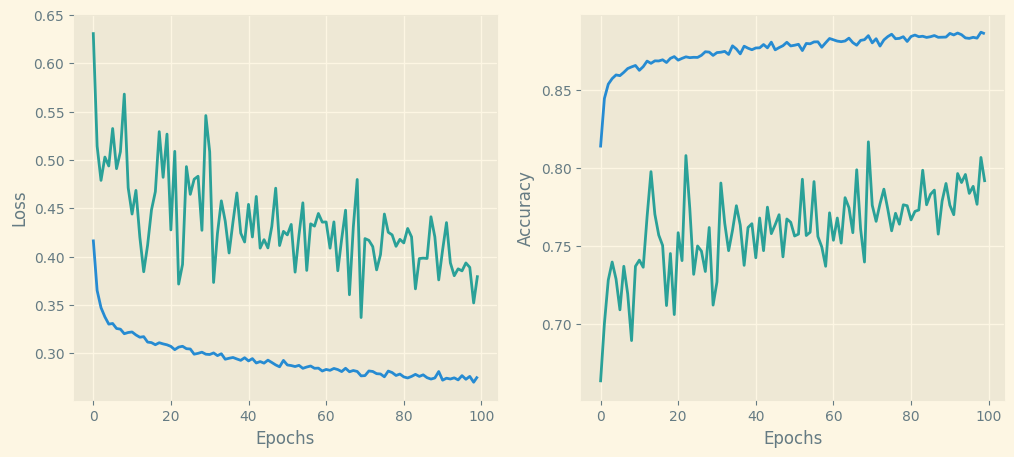

In [30]:
plot_loss_accuracy(history)

In [31]:
y_pred = model.predict(X_test)
y_pred = np.array([y_pred > 0.5]).astype(int)
y_pred = y_pred.reshape((-1,))
y_true = y_test

report = classification_report(y_true, y_pred)
print(report)

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      2206
           1       0.87      0.95      0.91      4071

    accuracy                           0.88      6277
   macro avg       0.88      0.85      0.86      6277
weighted avg       0.88      0.88      0.88      6277

